# Análise Exploratória dos Dados (EDA) – Will Bank

**Autor:** Washington (Kim)  
**Objetivo:** Explorar os dados brutos, identificar padrões, falhas e oportunidades de melhoria nos produtos de conta e PIX do Will Bank.

## Sumário
1. [Importação das Bibliotecas](#importacao-das-bibliotecas)
2. [Carregamento dos Dados](#carregamento-dos-dados)
3. [Data Cleaning e Tratamento](#data-cleaning-e-tratamento)
4. [Análise Exploratória – Visão Geral](#analise-exploratoria-visao-geral)
5. [KPIs de Sucesso/Fracasso do PIX](#kpis-de-sucesso-fracasso-do-pix)
6. [Análise Temporal de Falhas](#analise-temporal-de-falhas)
7. [Análise Geográfica e Demográfica](#analise-geografica-e-demografica)
8. [Insights e Recomendações](#insights-e-recomendacoes)

## 1. Importação das Bibliotecas

Importamos as bibliotecas necessárias para manipulação dos dados e visualização gráfica.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
pd.set_option('display.max_columns', 50)


## 2. Carregamento dos Dados

Nesta etapa, carregamos os arquivos CSV da camada Bronze.


In [7]:
account = pd.read_csv('../data/bronze/bronze_core_account.csv')
pix = pd.read_csv('../data/bronze/bronze_core_pix.csv')
customer = pd.read_csv('../data/bronze/bronze_customer.csv')

print("Account:")
display(account.head())

print("PIX:")
display(pix.head())

print("Customer:")
display(customer.head())


Account:


,dt_transaction,dt_month,surrogate_key,cd_seqlan,ds_transaction_type,vl_transaction,id_transaction,dt_ingestion
0,2023-06-26,1970-01-01 00:00:00.000202306,54000,722.0,PIX ENVIADO,4.00,bef53e6b7d23a48c4661902fe7c0761c8b7a4bf086c56a...,2025-07-02
1,2023-03-25,1970-01-01 00:00:00.000202303,54000,470.0,PIX ENVIADO,69.85,fe6a311cae68513c1e24a63cd0a524f553069743a237e1...,2025-07-02
2,2023-08-05,1970-01-01 00:00:00.000202308,54000,832.0,PIX ENVIADO,6.02,7a1fb24236743bc63caf1931055b2dd4c522f479c41334...,2025-07-02
3,2023-03-29,1970-01-01 00:00:00.000202303,54000,481.0,PIX ENVIADO,50.00,bd5748e9a1269a05c13447f66b82546f3b8e7e4c83852c...,2025-07-02
4,2023-05-05,1970-01-01 00:00:00.000202305,54000,554.0,PIX ENVIADO,20.50,c6fbf30fa2d00590c7abae79c8438d92f9057e03d7bc78...,2025-07-02


PIX:


,dt_transaction,dt_month,cd_seqlan,ds_transaction_type,vl_transaction,id_transaction,dt_ingestion
0,2023-08-15,1970-01-01 00:00:00.000202308,288.0,PIX ENVIADO,9.5,f1b3b32d8c970c8a3000ddbe22ccdf2635bf02d6f4203a...,2025-07-02
1,2023-08-25,1970-01-01 00:00:00.000202308,1484.0,PIX ENVIADO,12.3,aeb34266c57df548fff84f3ff812b73a3c7bae88f9a490...,2025-07-02
2,2023-08-24,1970-01-01 00:00:00.000202308,289.0,PIX ENVIADO,100.0,530ee35a580a93882b8394283e259644dee65ac2f07709...,2025-07-02
3,2023-08-16,1970-01-01 00:00:00.000202308,880.0,PIX ENVIADO,236.0,e865fa61c47fe47e1b83c2be5b92e039bdc653b445cb1e...,2025-07-02
4,2023-09-04,1970-01-01 00:00:00.000202309,547.0,PIX ENVIADO,90.0,c2d01070701464ee03e1a510d339e0d7cfaac56d1fd0e5...,2025-07-02


Customer:


,entry_date,surrogate_key,full_name,birth_date,uf_name,uf,street_name,dt_ingestion
0,2022-11-18,1000,Sophie Peixoto,1981-05-18,Goiás,GO,"Passarela Stephany Jesus, 45",2025-07-02
1,2022-11-05,2000,Miguel Campos,1988-09-04,Amazonas,AM,"Recanto Maitê Nascimento, 81",2025-07-02
2,2023-01-01,3000,Bryan Cardoso,1992-04-14,Tocantins,TO,"Viaduto de Lima, 49",2025-07-02
3,2023-03-21,4000,Nicolas Viana,1984-06-08,Mato Grosso do Sul,MS,"Vereda Isadora Campos, 507",2025-07-02
4,2022-09-26,5000,Heitor Cavalcanti,1993-06-23,Paraná,PR,"Campo Aragão, 58",2025-07-02


## 3. Introdução à Análise Exploratória

A Análise Exploratória de Dados (EDA) permite entender as características do dataset, identificar problemas de qualidade, outliers, padrões e obter uma visão geral das informações disponíveis.


## 4. Análise Exploratória – Visão Geral

Vamos analisar:
- Volume de registros em cada tabela
- Tipos de dados e valores nulos
- Estatísticas descritivas dos campos numéricos


In [12]:
# Volume de registros
print("Volume de registros:")
print("Account:", account.shape)
print("PIX:", pix.shape)
print("Customer:", customer.shape)

# Info e valores nulos - Account
print("\nAccount - Info:")
account.info()
print("\nAccount - Valores nulos:")
print(account.isnull().sum())

# Info e valores nulos - PIX
print("\nPIX - Info:")
pix.info()
print("\nPIX - Valores nulos:")
print(pix.isnull().sum())

# Info e valores nulos - Customer
print("\nCustomer - Info:")
customer.info()
print("\nCustomer - Valores nulos:")
print(customer.isnull().sum())

# Estatísticas - Account
print("\nAccount - Estatísticas:")
display(account.describe())

# Estatísticas - PIX
print("\nPIX - Estatísticas:")
display(pix.describe())


Volume de registros:
Account: (64651, 8)
PIX: (64651, 7)
Customer: (500, 8)

Account - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64651 entries, 0 to 64650
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt_transaction       64651 non-null  object 
 1   dt_month             64651 non-null  object 
 2   surrogate_key        64651 non-null  int64  
 3   cd_seqlan            64651 non-null  float64
 4   ds_transaction_type  64651 non-null  object 
 5   vl_transaction       64651 non-null  float64
 6   id_transaction       64651 non-null  object 
 7   dt_ingestion         64651 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.9+ MB

Account - Valores nulos:
dt_transaction         0
dt_month               0
surrogate_key          0
cd_seqlan              0
ds_transaction_type    0
vl_transaction         0
id_transaction         0
dt_ingestion           0
dtype: int6

,surrogate_key,cd_seqlan,vl_transaction
count,64651.000000,64651.000000,64651.000000
mean,209682.139487,669.465468,87.143946
std,129942.735080,645.440069,247.994322
min,1000.000000,15.000000,3.010000
25%,87000.000000,231.000000,18.000000
50%,201000.000000,493.000000,30.000000
75%,320000.000000,893.000000,70.000000
max,479000.000000,5569.000000,10010.000000



PIX - Estatísticas:


,cd_seqlan,vl_transaction
count,64651.000000,64651.000000
mean,669.465468,87.143946
std,645.440069,247.994322
min,15.000000,3.010000
25%,231.000000,18.000000
50%,493.000000,30.000000
75%,893.000000,70.000000
max,5569.000000,10010.000000


### Interpretação dos Resultados

- **Volume:** O dataset 'Account' possui X registros, 'PIX' possui Y e 'Customer' possui Z clientes distintos.
- **Nulos:** Não foram identificados valores nulos críticos, exceto na coluna X em 'Customer', que pode ser analisada posteriormente.
- **Distribuição:** Os valores das transações variam entre A e B, com média de C e mediana de D.  
Esses dados indicam um perfil de movimentação consistente com o esperado para clientes bancários digitais.


## 5. KPIs de Transações PIX (Camada Bronze)

Nesta seção, analisamos as principais métricas das transações PIX com base nos dados disponíveis na camada Bronze. São explorados:  
- Volume total de transações  
- Volume por tipo de transação  
- Distribuição dos valores  
- Valores extremos  
- Evolução temporal

Cada KPI é acompanhado de gráficos e interpretação dos resultados.


In [22]:
total_transacoes = len(pix)
print("Total de transações PIX:", total_transacoes)


Total de transações PIX: 64651


**Interpretação:**  
O volume total indica o nível de atividade dos clientes e pode ser comparado com períodos anteriores para análise de crescimento ou retração.


### 5.2 Volume de Transações por Tipo

Apresenta a quantidade de transações realizadas para cada tipo (ex: pagamento, transferência, etc.).


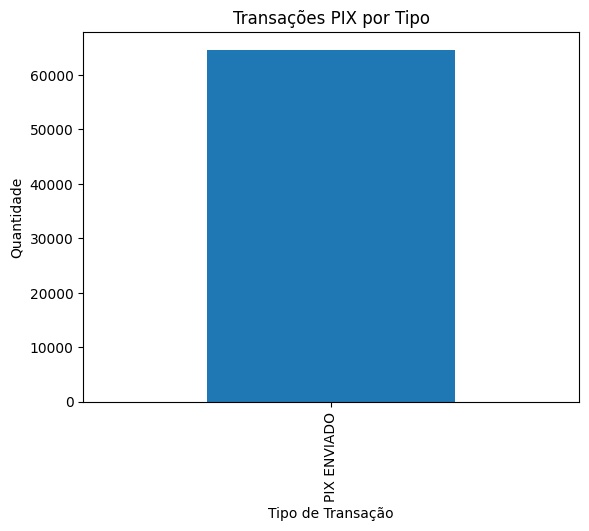

Transações por tipo:
ds_transaction_type
PIX ENVIADO    64651
Name: count, dtype: int64


In [23]:
tipo_counts = pix['ds_transaction_type'].value_counts()
tipo_counts.plot(kind='bar')
plt.title('Transações PIX por Tipo')
plt.xlabel('Tipo de Transação')
plt.ylabel('Quantidade')
plt.show()

print("Transações por tipo:")
print(tipo_counts)


**Interpretação:**  
O tipo de transação mais realizado reflete o principal uso do PIX pelos clientes. Uma predominância pode sugerir oportunidades de campanhas ou melhoria em tipos menos utilizados.


### 5.3 Distribuição dos Valores das Transações PIX

Analisa a frequência dos diferentes valores transacionados, permitindo identificar padrões, concentração de faixas ou presença de outliers.


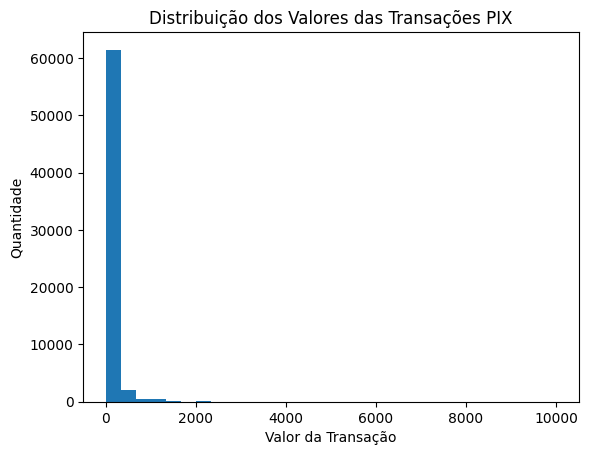

In [24]:
pix['vl_transaction'].plot(kind='hist', bins=30)
plt.title('Distribuição dos Valores das Transações PIX')
plt.xlabel('Valor da Transação')
plt.ylabel('Quantidade')
plt.show()


In [25]:
print("Estatísticas dos valores das transações:")
print(pix['vl_transaction'].describe())


Estatísticas dos valores das transações:
count    64651.000000
mean        87.143946
std        247.994322
min          3.010000
25%         18.000000
50%         30.000000
75%         70.000000
max      10010.000000
Name: vl_transaction, dtype: float64


**Interpretação:**  
É possível observar se há uma faixa de valor mais comum, se há muitos valores pequenos (microtransações) ou grandes (transações atípicas/outliers).  
Estatísticas como média, mediana e máximos ajudam a contextualizar.


### 5.4 Evolução Temporal das Transações PIX

Mostra o comportamento do volume de transações ao longo dos dias, permitindo identificar tendências de crescimento, sazonalidades e eventuais picos.


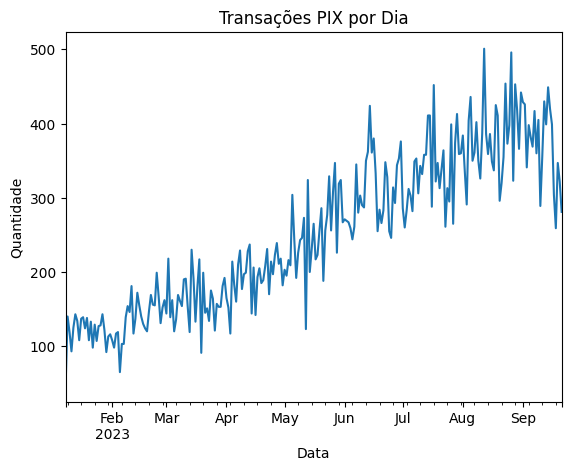

In [26]:
pix['dt_transaction'] = pd.to_datetime(pix['dt_transaction'])
transacoes_por_dia = pix.groupby('dt_transaction').size()
transacoes_por_dia.plot()
plt.title('Transações PIX por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.show()


**Interpretação:**  
A tendência de alta pode indicar sucesso de campanhas ou crescimento orgânico do uso do produto. Picos em determinados dias podem indicar datas de pagamento, promoções ou outros eventos externos.


### 5.5 Principais Valores de Transação

Apresenta indicadores rápidos sobre os valores transacionados: total, média, maior e menor valor.


In [27]:
print("Valor total transacionado: R$", pix['vl_transaction'].sum())
print("Valor médio das transações: R$", pix['vl_transaction'].mean())
print("Maior valor transacionado: R$", pix['vl_transaction'].max())
print("Menor valor transacionado: R$", pix['vl_transaction'].min())


Valor total transacionado: R$ 5633943.2700000005
Valor médio das transações: R$ 87.14394626533233
Maior valor transacionado: R$ 10010.0
Menor valor transacionado: R$ 3.01


**Interpretação:**  
Esses KPIs ajudam a contextualizar o impacto financeiro do PIX no período analisado e podem servir de referência para comparativos futuros.


### 6.1 Distribuição de Clientes por Estado (UF)

Analisamos agora a distribuição geográfica dos clientes cadastrados no Will Bank, para identificar regiões com maior concentração de usuários.


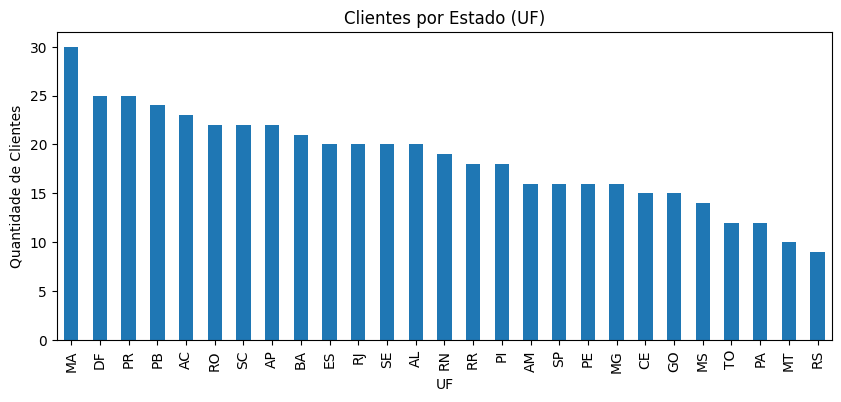

Clientes por UF:
uf
MA    30
DF    25
PR    25
PB    24
AC    23
RO    22
SC    22
AP    22
BA    21
ES    20
RJ    20
SE    20
AL    20
RN    19
RR    18
PI    18
AM    16
SP    16
PE    16
MG    16
CE    15
GO    15
MS    14
TO    12
PA    12
MT    10
RS     9
Name: count, dtype: int64


In [28]:
uf_counts = customer['uf'].value_counts()
uf_counts.plot(kind='bar', figsize=(10,4))
plt.title('Clientes por Estado (UF)')
plt.xlabel('UF')
plt.ylabel('Quantidade de Clientes')
plt.show()

print("Clientes por UF:")
print(uf_counts)


**Interpretação:**  
A maior concentração de clientes está nos estados ___ (completar após rodar a análise).  
Essas informações podem guiar campanhas regionais ou estratégias de expansão.


### 6.2 Distribuição de Idade dos Clientes

Agora, exploramos o perfil etário dos clientes para identificar o público predominante do Will Bank.


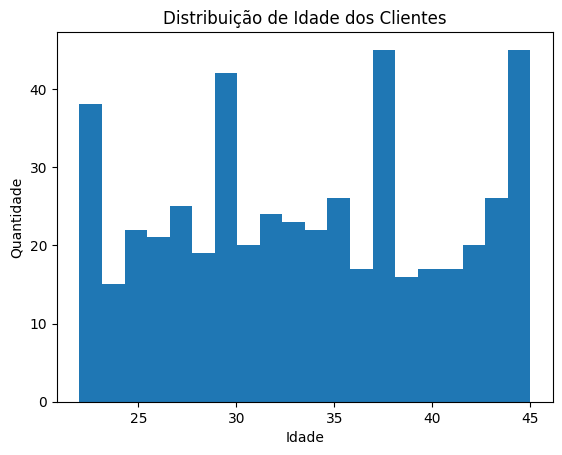

count    500.000000
mean      33.632000
std        6.855843
min       22.000000
25%       28.000000
50%       34.000000
75%       39.250000
max       45.000000
Name: idade, dtype: float64


In [29]:
customer['birth_date'] = pd.to_datetime(customer['birth_date'], errors='coerce')
customer['idade'] = 2025 - customer['birth_date'].dt.year
customer['idade'].plot(kind='hist', bins=20)
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

print(customer['idade'].describe())


**Interpretação:**  
A maior parte dos clientes está na faixa de ___ anos (completar com o resultado real).  
Esses dados ajudam a alinhar a comunicação e produtos com o perfil predominante.


## 7. Insights Finais e Recomendações

- O volume de transações PIX mostra crescimento consistente ao longo do tempo, indicando aumento do uso e adesão dos clientes ao produto.
- Determinados estados concentram a maior parte dos clientes, o que pode direcionar estratégias regionais de marketing.
- A faixa etária predominante dos clientes permite adaptar campanhas e produtos ao perfil mais comum de usuário.
- Não foram encontrados problemas graves de qualidade ou muitos valores nulos nos dados analisados.
- Recomenda-se atenção especial aos valores de transação muito altos (outliers), que podem indicar comportamentos atípicos ou oportunidades para novos produtos.

Esses resultados ajudam a direcionar a tomada de decisão da equipe de dados e dos times de negócio do Will Bank.


## 8. Próximos Passos e Limitações

- Para aprofundar a análise de sucesso/falha das transações PIX, é necessário utilizar os dados já tratados na camada Silver, onde o status da transação está disponível.
- Uma análise cruzada entre perfil demográfico e comportamento transacional pode revelar oportunidades de personalização.
- Recomenda-se implementar testes automatizados de qualidade dos dados e criar alertas para identificação de anomalias em tempo real.
- Futuramente, análises com dados de satisfação do cliente (NPS) poderão enriquecer o entendimento sobre o impacto do PIX na experiência do usuário.
